#Part-1 Link quality evaluation(40 Points)

##ESP

####Expected Signal Power is calculated from **Received Signal Strength Indicator (RSSI)** and **Signal-to-Noise Ratio (SNR)** of each data packet received by the gateway. We have tried to demonstrate the following steps that indicate how we can calculate ESP given all the other values.  

Get all the file names of csv format and concatenates into a single dataframe.

In [ ]:
import glob

import pandas as pd

# get data file names

local_path = r'/content/sample_data/Data'

filenames = glob.glob(local_path + "/*.csv")

dfs = [pd.read_csv(filename) for filename in filenames]


# if needed concatenate all data into one DataFrame

big_frame = pd.concat(dfs, ignore_index=True)

Output of bigframe

In [ ]:
big_frame 

,Distance,FrameCnt,Latitude,Longitude,RSSI,SNR,Time
0,1364.203643,52,39.999645,116.328500,-109,-7.0,2019-03-06T09:16:12.516252999Z
1,1371.005843,53,39.999587,116.328525,-110,-6.8,2019-03-06T09:16:21.807664Z
2,1372.275661,54,39.999582,116.328548,-111,-6.5,2019-03-06T09:16:31.752067Z
3,1374.312326,57,39.999565,116.328558,-110,-6.5,2019-03-06T09:16:52.649537Z
4,1373.893446,59,39.999573,116.328572,-108,-7.0,2019-03-06T09:17:06.039619Z
...,...,...,...,...,...,...,...
8952,744.497378,42,40.004305,116.322473,-118,-0.5,2019-03-11T10:29:56.332703994Z
8953,746.177041,44,40.004292,116.322637,-115,5.0,2019-03-11T10:30:11.204159837Z
8954,740.192009,45,40.004345,116.322602,-114,2.0,2019-03-11T10:30:20.253971285Z
8955,736.573421,46,40.004377,116.322523,-119,-2.2,2019-03-11T10:30:30.298460686Z


Exploratory data analysis for a single csv file, a chunk of the 'bigframe'

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/10000001.csv')
data

,Distance,FrameCnt,Latitude,Longitude,RSSI,SNR,Time
0,1392.196048,9,39.999805,116.329747,-101,6.0,2018-12-22T08:40:13.928014071Z
1,1407.306048,14,39.999673,116.329800,-111,-6.5,2018-12-22T08:40:48.618759381Z
2,1409.669260,15,39.999603,116.329678,-113,-2.5,2018-12-22T08:40:58.803296196Z
3,1408.405755,16,39.999597,116.329627,-112,-1.8,2018-12-22T08:41:07.863896Z
4,1402.407396,17,39.999587,116.329437,-115,-5.0,2018-12-22T08:41:18.235099Z
...,...,...,...,...,...,...,...
69,819.891205,139,40.014075,116.331167,-115,-11.5,2018-12-22T08:56:40.068348136Z
70,865.000607,140,40.014963,116.331160,-110,-10.5,2018-12-22T08:56:45.797704595Z
71,917.660126,142,40.015838,116.331153,-113,-13.8,2018-12-22T08:56:59.792100584Z
72,983.921697,144,40.016820,116.331132,-115,-12.2,2018-12-22T08:57:10.461070922Z


Using the formula mentioned in the docs to calculate ESP value and concatenate as an additional column in the existing dataframe

In [ ]:
import math
import numpy as np

big_frame['ESP'] = big_frame['RSSI'] + big_frame['SNR'] - 10*np.log(1 + np.power(10, 0.1 * big_frame['SNR']))

Output of dataframe after addition of 'ESP' column

In [ ]:
big_frame

,Distance,FrameCnt,Latitude,Longitude,RSSI,SNR,Time,ESP
0,1364.203643,52,39.999645,116.328500,-109,-7.0,2019-03-06T09:16:12.516252999Z,-117.819267
1,1371.005843,53,39.999587,116.328525,-110,-6.8,2019-03-06T09:16:21.807664Z,-118.697354
2,1372.275661,54,39.999582,116.328548,-111,-6.5,2019-03-06T09:16:31.752067Z,-119.520197
3,1374.312326,57,39.999565,116.328558,-110,-6.5,2019-03-06T09:16:52.649537Z,-118.520197
4,1373.893446,59,39.999573,116.328572,-108,-7.0,2019-03-06T09:17:06.039619Z,-116.819267
...,...,...,...,...,...,...,...,...
8952,744.497378,42,40.004305,116.322473,-118,-0.5,2019-03-11T10:29:56.332703994Z,-124.872385
8953,746.177041,44,40.004292,116.322637,-115,5.0,2019-03-11T10:30:11.204159837Z,-124.260624
8954,740.192009,45,40.004345,116.322602,-114,2.0,2019-03-11T10:30:20.253971285Z,-121.496842
8955,736.573421,46,40.004377,116.322523,-119,-2.2,2019-03-11T10:30:30.298460686Z,-125.916021


Final plot

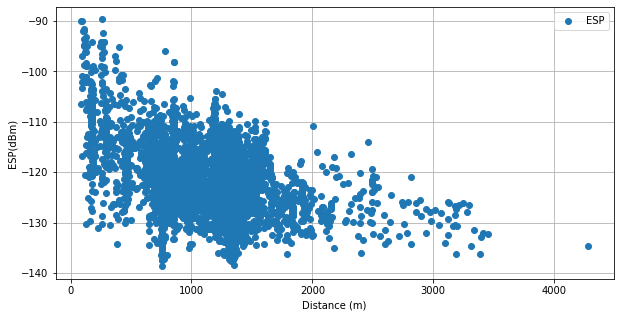

In [ ]:
import matplotlib.pyplot as plt
big_frame.plot(x='Distance', y='ESP', style='o', figsize=(10, 5))
plt.xlabel("Distance (m)")
plt.ylabel("ESP(dBm)")
plt.grid()

Discussions:
We believe that we were close to our value estimation for ESP(dBm). As we know, the Estimated Signal Power is the received signal strength of the device by the gateway. This graph clearly describes how the power fades away as the distance increases. For example, the density at 1000 m from the given reference point is more intense as compared to the density at 4000 m from the reference point. 

##PDR
####Packet Delivery Ratio (PDR) can be measured as the ratio of **number of packets delivered in total** to the **total number of packets sent from source node to destination node** in the network. 

####Here, we have tried to demonstrate the following steps that indicate how we can calculate PDR given all the other values.

####We have considered **number of packets delivered in total** as difference of (ending FrameCnt - start FrameCnt), where we have selected the packets based on certain numer of frames and that's how the start and ending frame are defines. In this scenario, we have used our X value as 10. Then, we divided this result with **total number of packets sent from source node to destination node**. 

Get all the file names of csv format from google drive and concatenates into a single dataframe.

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
import glob

import pandas as pd

# get data file names

local_path = r'/content/gdrive/MyDrive/MSU Sem - III/CSE 891/Project-2'

filenames = glob.glob(local_path + "/*.csv")

dfs = [pd.read_csv(filename) for filename in filenames]


# if needed concatenate all data into one DataFrame

big_frame = pd.concat(dfs, ignore_index=True)

Exploratpry Data Analysis for big_frame dataframe

In [26]:
print(len(big_frame['FrameCnt']))

2997


In [7]:
print(big_frame)

         Distance  FrameCnt   Latitude   Longitude  RSSI   SNR  \
0      274.980420        30  40.008763  116.321075  -115  -2.8   
1      311.135419        31  40.008427  116.321018  -111  -3.2   
2      344.495933        33  40.008095  116.321048  -107   5.5   
3      375.169022        34  40.007798  116.321065  -110  -1.2   
4      409.558120        36  40.007472  116.321075  -113 -12.8   
...           ...       ...        ...         ...   ...   ...   
2992  1314.805252        51  39.999880  116.327687  -111  -7.8   
2993  1328.007784        52  39.999868  116.328085  -109  -1.0   
2994  1343.712964        55  39.999775  116.328278  -109   1.8   
2995  1338.670284        56  39.999840  116.328330  -108 -12.2   
2996  1328.996642        57  39.999948  116.328375  -110 -12.2   

                                Time  
0     2018-12-23T00:04:38.688748112Z  
1     2018-12-23T00:04:48.415897841Z  
2     2018-12-23T00:05:02.500091999Z  
3     2018-12-23T00:05:08.364110358Z  
4     2018-1

Calculate the result by taking difference of every 10th frame and iterate until we reach the end of the data

In [34]:
#every ten frames
data = big_frame
ind = 0
res = 0
fin = []

while len(fin) <= len(data):
  
  res = (abs(data['FrameCnt'][ind+10] -  data['FrameCnt'][ind]))/data['FrameCnt'][ind+10] 
  print(res) 
  if res > 1:
    res = 1
  for _ in range(10):
    fin.append(res)
  if ind + 20 >= len(data):
    for _ in range(7):
      fin.append(1)
    break
  else:
    ind = ind + 10

print(fin)
data['pd'] = fin
print(data['pd'])

0.5454545454545454
0.5
5.285714285714286
0.6818181818181818
0.37142857142857144
0.6929824561403509
0.1297709923664122
0.31413612565445026
0.07281553398058252
0.10822510822510822
0.06477732793522267
0.01593625498007968
0.0599250936329588
0.0498220640569395
0.48534798534798534
0.05536332179930796
0.05555555555555555
0.0208
0.03400309119010819
0.04431314623338257
0.024495677233429394
0.030726256983240222
0.02717391304347826
7.363636363636363
0.2542372881355932
0.24358974358974358
8.75
0.5
0.42857142857142855
0.28205128205128205
0.15217391304347827
0.12380952380952381
0.18604651162790697
0.11643835616438356
0.43137254901960786
0.24444444444444444
0.1346153846153846
0.11864406779661017
0.10152284263959391
0.11659192825112108
0.06302521008403361
0.05555555555555555
0.056179775280898875
2.3797468354430378
0.025974025974025976
0.2222222222222222
0.1951219512195122
0.174496644295302
0.16759776536312848
0.432
0.11347517730496454
0.12962962962962962
0.07428571428571429
0.08854166666666667
0.09859

Numpy array result of PDR values

In [33]:
import numpy as np
fin_arr = np.array(fin)
fin_arr

array([0.54545455, 0.54545455, 0.54545455, ..., 1.        , 1.        ,
       1.        ])

Display data after adding 'pd' value column

In [ ]:
print(data)

              PL     Distance  FrameCnt   Latitude   Longitude  RSSI   SNR  \
0     120.973228  1392.196048         9  39.999805  116.329747  -101   6.0   
1     137.377360  1407.306048        14  39.999673  116.329800  -111  -6.5   
2     136.437759  1409.669260        15  39.999603  116.329678  -113  -2.5   
3     135.002895  1408.405755        16  39.999597  116.329627  -112  -1.8   
4     140.193310  1402.407396        17  39.999587  116.329437  -115  -5.0   
...          ...          ...       ...        ...         ...   ...   ...   
7188  140.073822  1293.231155        48  39.999835  116.326698  -112  -8.5   
7189  137.737602  1299.925429        50  39.999888  116.327185  -106 -12.5   
7190  138.466832  1314.805252        51  39.999880  116.327687  -111  -7.8   
7191  131.539019  1328.007784        52  39.999868  116.328085  -109  -1.0   
7192  130.202895  1343.712964        55  39.999775  116.328278  -109   1.8   

                                Time         n       PDR       

Tryig to figure out the max range of 'pd' column

In [ ]:
max(data['pd'])

1.0

Final result of plotting PDR(dBm) vs Distance(m)

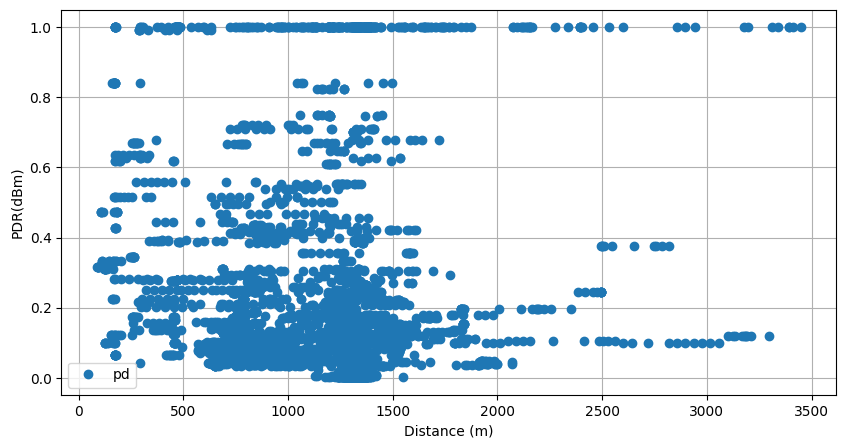

In [ ]:
import matplotlib.pyplot as plt
data.plot(x='Distance', y='pd', style='o', figsize=(10, 5))
plt.xlabel("Distance (m)")
plt.ylabel("PDR(dBm)")
plt.grid()

Tried to plot respective results of single csv files to get an overall idea of the entire cummulative plot

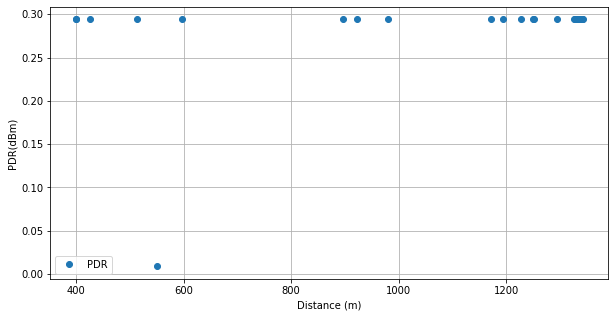

In [ ]:
import matplotlib.pyplot as plt
data.plot(x='Distance', y='PDR', style='o', figsize=(10, 5))
plt.xlabel("Distance (m)")
plt.ylabel("PDR(dBm)")
plt.grid()

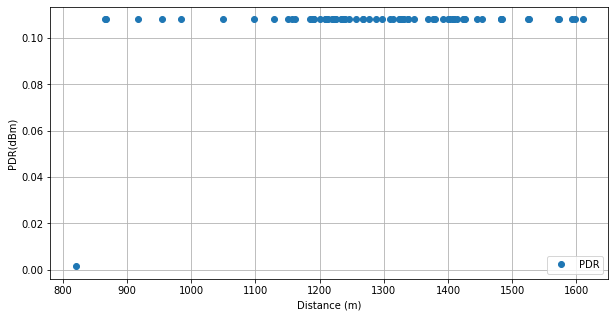

In [ ]:
import matplotlib.pyplot as plt
data.plot(x='Distance', y='PDR', style='o', figsize=(10, 5))
plt.xlabel("Distance (m)")
plt.ylabel("PDR(dBm)")
plt.grid()

Discussions: We believe that we were close to our value estimation for PDR(dBm). As mentioend before our X value was taken as 10 and then average it to get the final result that lead to getting maximum PDR point in the range as visible in the graph. We could have experimented with different X values to give various results. 

#Part - 2 Link Model Exploration (60 Points)

Read data from csv file

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/train.csv')
print(data)

              PL     Distance  FrameCnt   Latitude   Longitude  RSSI   SNR  \
0     120.973228  1392.196048         9  39.999805  116.329747  -101   6.0   
1     137.377360  1407.306048        14  39.999673  116.329800  -111  -6.5   
2     136.437759  1409.669260        15  39.999603  116.329678  -113  -2.5   
3     135.002895  1408.405755        16  39.999597  116.329627  -112  -1.8   
4     140.193310  1402.407396        17  39.999587  116.329437  -115  -5.0   
...          ...          ...       ...        ...         ...   ...   ...   
7188  140.073822  1293.231155        48  39.999835  116.326698  -112  -8.5   
7189  137.737602  1299.925429        50  39.999888  116.327185  -106 -12.5   
7190  138.466832  1314.805252        51  39.999880  116.327687  -111  -7.8   
7191  131.539019  1328.007784        52  39.999868  116.328085  -109  -1.0   
7192  130.202895  1343.712964        55  39.999775  116.328278  -109   1.8   

                                Time  
0     2018-12-22T08:40:1

To calculate d0 value

In [ ]:
d0=min(data['Distance'])
print(d0)

85.44144273899816


To calculate PL0 value as per d0

In [ ]:
mask = data['Distance'].values == d0
PL0 = data[mask]['PL']
PL0

5766    115.87736
Name: PL, dtype: float64

In [ ]:
data

,PL,Distance,FrameCnt,Latitude,Longitude,RSSI,SNR,Time
0,120.973228,1392.196048,9,39.999805,116.329747,-101,6.0,2018-12-22T08:40:13.928014071Z
1,137.377360,1407.306048,14,39.999673,116.329800,-111,-6.5,2018-12-22T08:40:48.618759381Z
2,136.437759,1409.669260,15,39.999603,116.329678,-113,-2.5,2018-12-22T08:40:58.803296196Z
3,135.002895,1408.405755,16,39.999597,116.329627,-112,-1.8,2018-12-22T08:41:07.863896Z
4,140.193310,1402.407396,17,39.999587,116.329437,-115,-5.0,2018-12-22T08:41:18.235099Z
...,...,...,...,...,...,...,...,...
7188,140.073822,1293.231155,48,39.999835,116.326698,-112,-8.5,2019-03-15T01:22:17.533416799Z
7189,137.737602,1299.925429,50,39.999888,116.327185,-106,-12.5,2019-03-15T01:22:31.781146313Z
7190,138.466832,1314.805252,51,39.999880,116.327687,-111,-7.8,2019-03-15T01:22:37.784797291Z
7191,131.539019,1328.007784,52,39.999868,116.328085,-109,-1.0,2019-03-15T01:22:47.39331864Z


Use the formula mentioned in the project specs 

In [ ]:
import math
res = []
for i in range(len(data)):
  #print('float(data[PL][i])-float(PL0)',float(data['PL'][i])-float(PL0))
  #print("10*math.log(float(data['Distance'][i])/float(d0)",10*math.log(float(data['Distance'][i])/float(d0)))
  res.append((float(data['PL'][i])-float(PL0))/10*math.log(float(data['Distance'][i])/float(d0)))

Use the res as the dataframe 'n'

In [ ]:
data['n'] = res
print(data['n'])

0       1.422158
1       6.023443
2       5.763654
3       5.359706
4       6.803881
          ...   
7188    6.574343
7189    5.950863
7190    6.175086
7191    4.296939
7192    3.947201
Name: n, Length: 7193, dtype: float64


In [ ]:
data.head(2)

,PL,Distance,FrameCnt,Latitude,Longitude,RSSI,SNR,Time,n
0,120.973228,1392.196048,9,39.999805,116.329747,-101,6.0,2018-12-22T08:40:13.928014071Z,1.422158
1,137.377360,1407.306048,14,39.999673,116.329800,-111,-6.5,2018-12-22T08:40:48.618759381Z,6.023443


In [ ]:
data.drop(['FrameCnt', 'Latitude', 'Longitude', 'RSSI', 'SNR', 'Time'], axis=1)

,PL,Distance,n
0,120.973228,1392.196048,1.422158
1,137.377360,1407.306048,6.023443
2,136.437759,1409.669260,5.763654
3,135.002895,1408.405755,5.359706
4,140.193310,1402.407396,6.803881
...,...,...,...
7188,140.073822,1293.231155,6.574343
7189,137.737602,1299.925429,5.950863
7190,138.466832,1314.805252,6.175086
7191,131.539019,1328.007784,4.296939


Linear regression model

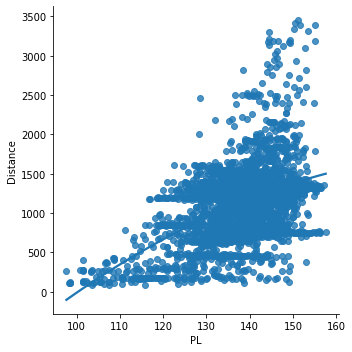

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.lmplot(x ="PL", y ="Distance", data = data, order = 2, ci = None)

In [ ]:
reg = LinearRegression()
reg.fit(data[['PL','Distance']],data['n'])

LinearRegression()

In [ ]:
reg.coef_

array([0.23333265, 0.00204491])

In [ ]:
reg.intercept_

-28.653954435574125

Data preparation for the visualization

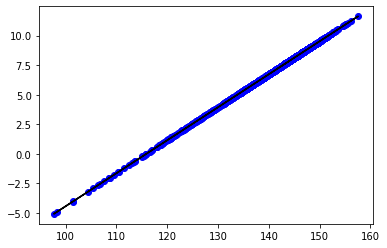

In [ ]:
X = data[['PL','Distance']].values.reshape(-1,2)
Y = data['n']

y_pred = reg.predict(X)
plt.scatter(X, y, color ='b')
plt.plot(X, y, color ='k')
  
plt.show()

We tried to research for better visualization for trained model. Prepare the model data points for visualization to train, evaluate and plot the regression model 

ref: https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b


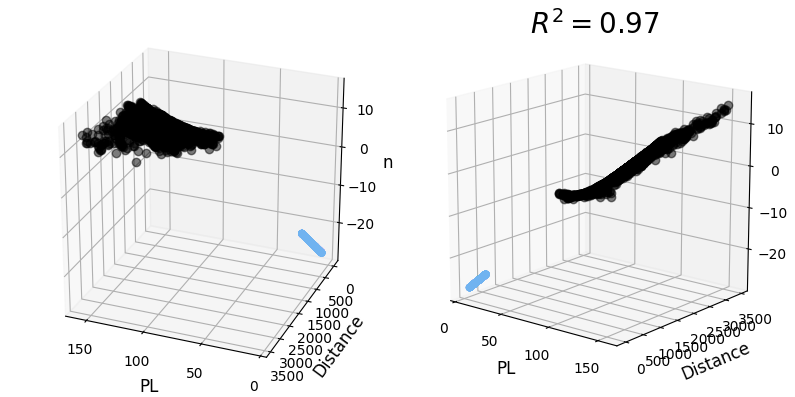

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0.93, 2.9, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('PL', fontsize=12)
    ax.set_ylabel('Distance', fontsize=12)
    ax.set_zlabel('n', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()



Use train.csv file to test our linear model

In [ ]:
import pandas as pd
test_data = pd.read_csv('/content/sample_data/test.csv')
print(test_data)

              PL     Distance  FrameCnt   Latitude   Longitude  RSSI   SNR  \
0     132.603736  1308.948859        24  40.000097  116.328227  -112   3.5   
1     132.324741  1267.813865        25  40.000483  116.328182  -111   1.5   
2     135.599387  1190.898224        47  40.002358  116.330673  -111  -4.2   
3     133.267492  1199.849353        51  40.002330  116.330800  -111  -0.5   
4     130.539019  1525.688059        70  39.999145  116.331442  -109   1.0   
...          ...          ...       ...        ...         ...   ...   ...   
1759  135.814126  1268.170890        28  39.999688  116.320472  -110  -5.8   
1760  142.596121  1260.603639        42  39.999733  116.324142  -113 -10.2   
1761  140.232494  1262.692555        43  39.999773  116.324705  -111  -9.8   
1762  139.454107  1338.670284        56  39.999840  116.328330  -108 -12.2   
1763  141.454107  1328.996642        57  39.999948  116.328375  -110 -12.2   

                                Time  
0     2018-12-22T08:42:1

In [ ]:
test_data = test_data.drop(['FrameCnt', 'Latitude', 'Longitude', 'RSSI', 'SNR', 'Time'], axis=1)

In [ ]:
print(test_data)

              PL     Distance
0     132.603736  1308.948859
1     132.324741  1267.813865
2     135.599387  1190.898224
3     133.267492  1199.849353
4     130.539019  1525.688059
...          ...          ...
1759  135.814126  1268.170890
1760  142.596121  1260.603639
1761  140.232494  1262.692555
1762  139.454107  1338.670284
1763  141.454107  1328.996642

[1764 rows x 2 columns]


y_pred is the predicted value of 'n' when the test.csv is used as input. 

In [ ]:
y_pred = reg.predict(test_data)
print(y_pred)


[4.96351135 4.81429532 5.42109143 ... 6.64895969 6.62270439 7.06958794]


Here we will compare our manually calculated values and the predicted values. 

In [ ]:
dt0 = min(test_data['Distance'])
print(dt0)
mask = test_data['Distance'].values == dt0
PLt0 = test_data[mask]['PL'] 
print(PLt0)
import math
res2 = []
for i in range(len(test_data)):
  res2.append((float(test_data['PL'][i])-float(PLt0))/10*math.log(float(test_data['Distance'][i])/float(dt0)))

88.48178100999333
306    95.413927
Name: PL, dtype: float64


In [ ]:
print(len(res2))
print(len(y_pred))

1764
1764


Plot of predicted and test values

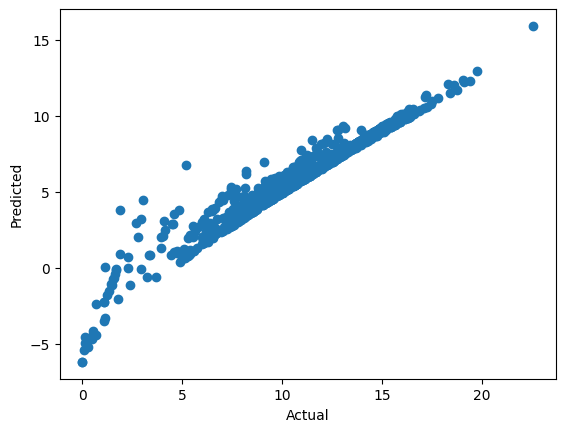

In [ ]:
plt.scatter(res2,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
test_data['n'] = res2
print(test_data['n'])

0       10.019615
1        9.826591
2       10.446879
3        9.869010
4       10.001533
          ...    
1759    10.756691
1760    12.534182
1761    11.913694
1762    11.964111
1763    12.474048
Name: n, Length: 1764, dtype: float64


In [ ]:
print(res2)
print(len(res2))
print(y_pred)
print(len(y_pred))

[10.019615149581735, 9.826591275150834, 10.446879196071963, 9.869009622054124, 10.001533137622832, 10.847480706657493, 10.456848895606107, 9.577103399761496, 12.24588919244977, 11.707881242320612, 13.875453728680498, 15.19911225220572, 10.401515686495172, 11.217175108161587, 3.9321993098364243, 4.550730635620752, 0.30098773323238215, 0.5062621765439154, 1.4726975928740504, 2.812229872982132, 1.8812071140108642, 1.1191270430375997, 1.6358168515037572, 1.441957862049683, 1.713862259756662, 1.5760781749432229, 10.748728617970718, 10.58117326694956, 9.85803524939973, 10.650213194625325, 4.932402192017101, 5.103426038313216, 13.107702163770004, 13.386198274027029, 11.214631210514998, 11.146102033391161, 11.513412747309403, 10.922133928906412, 12.185860864372568, 11.886016612205959, 14.848353914584116, 15.823480181169277, 12.90462824926841, 17.08779019421038, 15.658462137561035, 14.193972883373783, 14.448989398418293, 13.867564409938645, 15.448873028376319, 16.2741277577129, 15.6118745005561

List of error

In [ ]:
i = 0
err=[]
while i < len(y_pred):
  err.append(res2[i] - y_pred[i])
  i+=1
print(err)

[5.05610380444373, 5.012295956761454, 5.0257877624355185, 4.973721217985149, 5.0765750041800715, 5.226951384735816, 5.124416196148498, 5.00230731119983, 5.237950735659524, 5.178312425128842, 5.654244919908347, 5.900975251801869, 4.387403757923851, 4.1753099327330645, 2.6316239612422945, 1.6497210321048996, 5.503320230091749, 5.232331608283749, 2.6366027958238956, 0.7624861993374901, -1.9044271560568853, 1.0789106234365373, 2.051223268285322, 2.537764349846479, 1.795857613438218, 2.241168796886171, 5.16706597269574, 5.143065505104454, 5.0405485756421555, 5.131758382118283, 4.075082776918595, 3.8564146413915097, 5.313535636557376, 5.278917433192172, 4.417988215723227, 4.355454154130447, 3.074616124936373, 3.1634672534570107, 4.5706560782895025, 4.621032372632255, 5.8474221703643074, 6.055735274481584, 5.5941173866574445, 6.592777891744255, 6.2502395692563155, 5.897147813337751, 5.957171848647787, 5.816329491899953, 6.194403710851493, 6.398561193482067, 6.236584690752865, 6.63825469058078

Find all the error values : min, max, mean, median and rms

In [ ]:
import statistics
from sklearn.metrics import mean_squared_error
print('min(err)',min(err))
print('max(err)',max(err))
print('mean(err)',statistics.mean(err))
print('median(err)',statistics.median(err))
rms = mean_squared_error(res2, y_pred, squared=False)
print('rms',rms)

min(err) -1.9044271560568853
max(err) 7.0652573469380435
mean(err) 5.152179297923622
median(err) 5.50026711251445
rms 5.223676040171309


Discussion: For training a linear model, we have considered the zero mean gaussian value as constant assuming that it will have very minimal effect on our model even while we train and we test. As per the evaluation of the model, we have minimum, maximum, mean, median and rms values within accepted ranges. This can also be confirmed with the r2_score of around 0.97. This implies that our model is fairly accurate as it is very close to the manually found the value.

References:
1. https://www.analyticsvidhya.com/blog/2022/03/multiple-linear-regression-using-python/
2. https://en.wikipedia.org/wiki/Log-distance_path_loss_model
3. https://www.youtube.com/watch?v=4bCqRaxxGCg